In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/ikbalhossain/Documents/projects/PROJECT_STARBUCKS/starbucks_drinks.csv")

In [3]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


# Data Cleaning and Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Beverage_category         242 non-null    object 
 1   Beverage                  242 non-null    object 
 2   Beverage_prep             242 non-null    object 
 3   Calories                  242 non-null    int64  
 4   Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)             242 non-null    float64
 6   Saturated Fat (g)         242 non-null    float64
 7   Sodium (mg)               242 non-null    int64  
 8   Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)          242 non-null    int64  
 10  Dietary Fibre (g)         242 non-null    int64  
 11  Sugars (g)                242 non-null    int64  
 12  Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)          242 non-null    object 
 14  Vitamin C 

##### 
We can see the datatypes in Columns 4,13-17 has error , They are in object format we will have to change them to float and int.
Another point is the Caffeine(mg) column has a data missing so we will have that too.

In [5]:
# for  "Total Fat (g)" column on the index of 237 we have a value '3 2'. 
#We can guess that it has a missing dot, so we are replacing it as '3.2'

df['Total Fat (g)'] = df['Total Fat (g)'].replace('3 2','3.2')

In [6]:
# Chaning the column object to float
df['Total Fat (g)']=df['Total Fat (g)'].astype("float")

In [7]:
#Renaming The Columns

In [8]:
df.rename(columns={df.columns[13]: 'Vitamin_A'},inplace=True)

In [9]:
df.rename(columns={df.columns[14]: 'Vitamin_C'},inplace=True)

In [10]:
df.rename(columns={df.columns[15]: 'Calcium'},inplace=True)

In [11]:
df.rename(columns={df.columns[16]: 'Iron'},inplace=True)

In [12]:
#Removing % from the rows of columns and then converting to int

In [13]:
df['Vitamin_A'] = df['Vitamin_A'].str.rstrip("%").astype(int)

In [14]:
df['Vitamin_C'] = df['Vitamin_C'].str.rstrip("%").astype(int)

In [15]:
df['Calcium'] = df['Calcium'].str.rstrip("%").astype(int)

# 
For the Iron it was not converting to int so we convert it to float first then converted to int

In [16]:
df['Iron'] = df['Iron'].replace('0.00','0%')

In [17]:
df['Iron'] = df['Iron'].str.rstrip("%").astype(float)*100
df['Iron']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
237    1000.0
238       0.0
239       0.0
240     600.0
241       0.0
Name: Iron, Length: 242, dtype: float64

In [18]:
df['Iron'] = df['Iron'].astype(float)/100
df['Iron']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
237    10.0
238     0.0
239     0.0
240     6.0
241     0.0
Name: Iron, Length: 242, dtype: float64

In [19]:
df['Iron']=df['Iron'].astype(int)

In [20]:
df["Caffeine (mg)"].value_counts()

75        37
0         35
150       34
70        14
varies    12
95        11
Varies    10
110        9
130        7
25         6
120        6
90         4
175        4
20         3
125        3
10         3
145        3
50         3
100        3
140        3
55         3
80         3
180        3
85         3
30         3
15         3
170        3
165        2
410        1
235        1
330        1
225        1
260        1
300        1
65         1
105        1
Name: Caffeine (mg), dtype: int64

In [21]:
# For column Caffeine (mg) we have some string values so we will replace those values as nan

In [22]:
#df["Caffeine (mg)"] = df["Caffeine (mg)"].replace('Varies',np.nan)

In [23]:
#df["Caffeine (mg)"].value_counts()

In [24]:
df["Caffeine (mg)"] = df["Caffeine (mg)"].replace('varies',np.nan)

In [25]:
df["Caffeine (mg)"] = df["Caffeine (mg)"].replace('Varies',np.nan)

In [26]:
#df["Caffeine (mg)"]=df["Caffeine (mg)"].value_counts()

In [27]:
# so we replaced all the string value from the column

In [28]:
#df.dtypes

In [29]:
#df["Caffeine (mg)"].value_counts()

In [30]:
avg_caffeine=df["Caffeine (mg)"].astype("float").mean(axis=0)
print("Average of Caffeine:", avg_caffeine)

Average of Caffeine: 89.52054794520548


In [31]:
df["Caffeine (mg)"].replace(np.nan, avg_caffeine, inplace=True)

In [32]:
df["Caffeine (mg)"].value_counts()

75                   37
0                    35
150                  34
89.52054794520548    23
70                   14
95                   11
110                   9
130                   7
120                   6
25                    6
90                    4
175                   4
125                   3
55                    3
15                    3
140                   3
100                   3
80                    3
145                   3
170                   3
50                    3
30                    3
20                    3
10                    3
180                   3
85                    3
165                   2
260                   1
235                   1
300                   1
225                   1
410                   1
330                   1
65                    1
105                   1
Name: Caffeine (mg), dtype: int64

In [33]:
df["Caffeine (mg)"]=df["Caffeine (mg)"].astype("int")

In [34]:
df["Caffeine (mg)"].value_counts()

75     37
0      35
150    34
89     23
70     14
95     11
110     9
130     7
120     6
25      6
90      4
175     4
125     3
55      3
15      3
140     3
100     3
80      3
145     3
170     3
50      3
30      3
20      3
10      3
180     3
85      3
165     2
260     1
235     1
300     1
225     1
410     1
330     1
65      1
105     1
Name: Caffeine (mg), dtype: int64

In [35]:
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin_A,Vitamin_C,Calcium,Iron,Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6,0


In [36]:
df.dtypes

Beverage_category            object
Beverage                     object
Beverage_prep                object
Calories                      int64
Total Fat (g)               float64
Trans Fat (g)               float64
Saturated Fat (g)           float64
Sodium (mg)                   int64
Total Carbohydrates (g)       int64
Cholesterol (mg)              int64
Dietary Fibre (g)             int64
Sugars (g)                    int64
Protein (g)                 float64
Vitamin_A                     int64
Vitamin_C                     int64
Calcium                       int64
Iron                          int64
Caffeine (mg)                 int64
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Beverage_category         242 non-null    object 
 1   Beverage                  242 non-null    object 
 2   Beverage_prep             242 non-null    object 
 3   Calories                  242 non-null    int64  
 4   Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)             242 non-null    float64
 6   Saturated Fat (g)         242 non-null    float64
 7   Sodium (mg)               242 non-null    int64  
 8   Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)          242 non-null    int64  
 10  Dietary Fibre (g)         242 non-null    int64  
 11  Sugars (g)                242 non-null    int64  
 12  Protein (g)               242 non-null    float64
 13  Vitamin_A                 242 non-null    int64  
 14  Vitamin_C 

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Total Fat (g),242.0,2.904959,2.944376,0.0,0.2,2.5,4.50,15.0
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.1,0.5,2.00,9.0
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.0,0.0,0.10,0.3
Sodium (mg),242.0,6.363636,8.630257,0.0,0.0,5.0,10.00,40.0
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.0,125.0,170.00,340.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.0,0.0,1.00,8.0
Sugars (g),242.0,32.962810,19.730199,0.0,18.0,32.0,43.75,84.0
Protein (g),242.0,6.978512,4.871659,0.0,3.0,6.0,10.00,20.0


<AxesSubplot:>

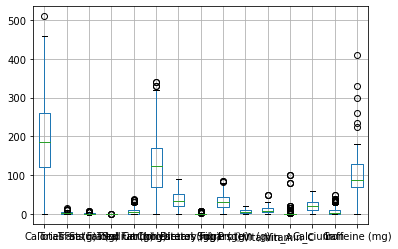

In [39]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Total Fat (g)'}>,
        <AxesSubplot:title={'center':'Trans Fat (g) '}>,
        <AxesSubplot:title={'center':'Saturated Fat (g)'}>],
       [<AxesSubplot:title={'center':'Sodium (mg)'}>,
        <AxesSubplot:title={'center':'Total Carbohydrates (g) '}>,
        <AxesSubplot:title={'center':'Cholesterol (mg)'}>,
        <AxesSubplot:title={'center':'Dietary Fibre (g)'}>],
       [<AxesSubplot:title={'center':'Sugars (g)'}>,
        <AxesSubplot:title={'center':'Protein (g) '}>,
        <AxesSubplot:title={'center':'Vitamin_A'}>,
        <AxesSubplot:title={'center':'Vitamin_C'}>],
       [<AxesSubplot:title={'center':'Calcium'}>,
        <AxesSubplot:title={'center':'Iron'}>,
        <AxesSubplot:title={'center':'Caffeine (mg)'}>, <AxesSubplot:>]],
      dtype=object)

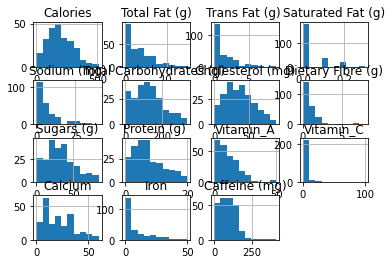

In [40]:
df.hist()

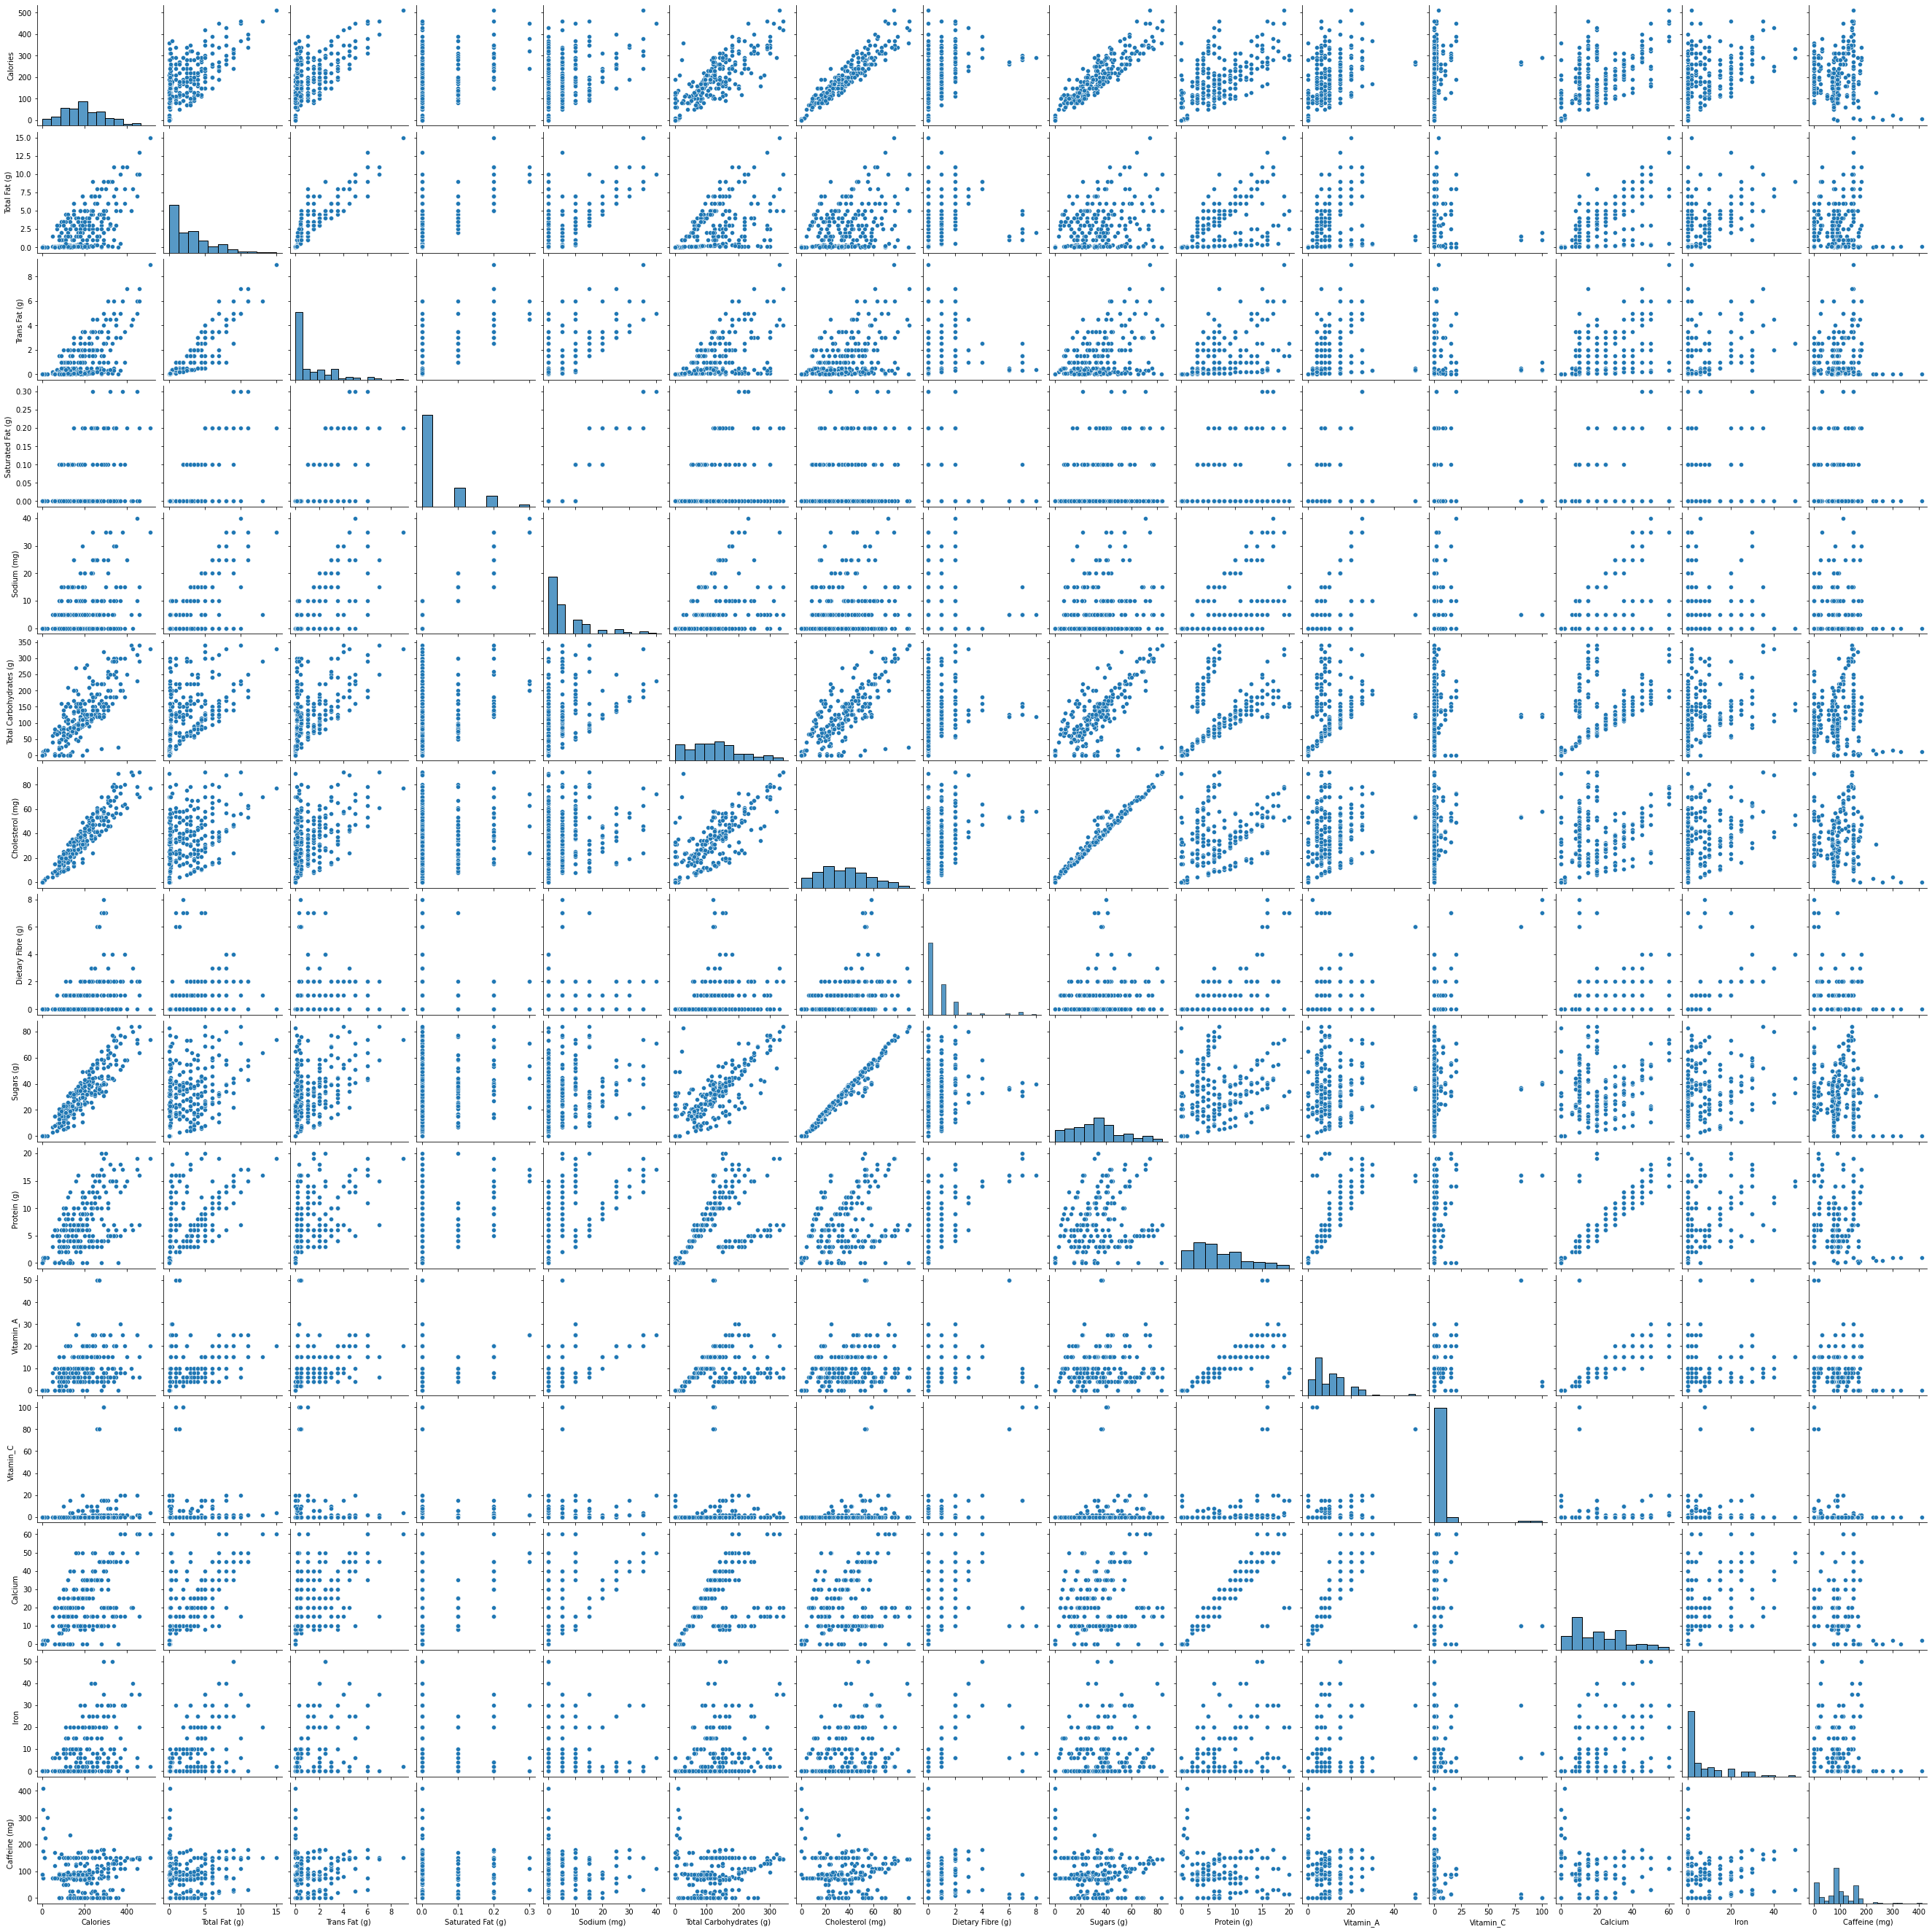

In [41]:
sns.pairplot(df)

## Categorical Variables

In [42]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin_A,Vitamin_C,Calcium,Iron,Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75


In [43]:
df['Beverage_category'].value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

In [44]:
df['Beverage'].value_counts()

Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Latte)               12
Caffè Mocha (Without Whipped Cream)                    12
Caffè Latte                                            12
Iced Brewed Coffee (With Milk & Classic Syrup)          9
Caramel (Without Whipped Cream)                         9
Java Chip (Without Whipped Cream)                       9
Mocha (Without Whipped Cream)                           9
Strawberries & Crème (Without Whipped Cream)            9
Brewed Coffee 

In [45]:
df['Beverage_prep'].value_counts()

Soymilk               66
2% Milk               50
Grande Nonfat Milk    26
Tall Nonfat Milk      23
Venti Nonfat Milk     22
Whole Milk            16
Short Nonfat Milk     12
Tall                   7
Grande                 7
Venti                  7
Short                  4
Solo                   1
Doppio                 1
Name: Beverage_prep, dtype: int64

In [46]:
# Changing category variables to category type

In [47]:
df.Beverage_category = df.Beverage_category.astype('category').cat.as_ordered()

In [48]:
df.Beverage_prep = df.Beverage_prep.astype('category').cat.as_ordered()

<AxesSubplot:title={'center':'Count of BVG CAtegory'}, xlabel='count', ylabel='Beverage_category'>

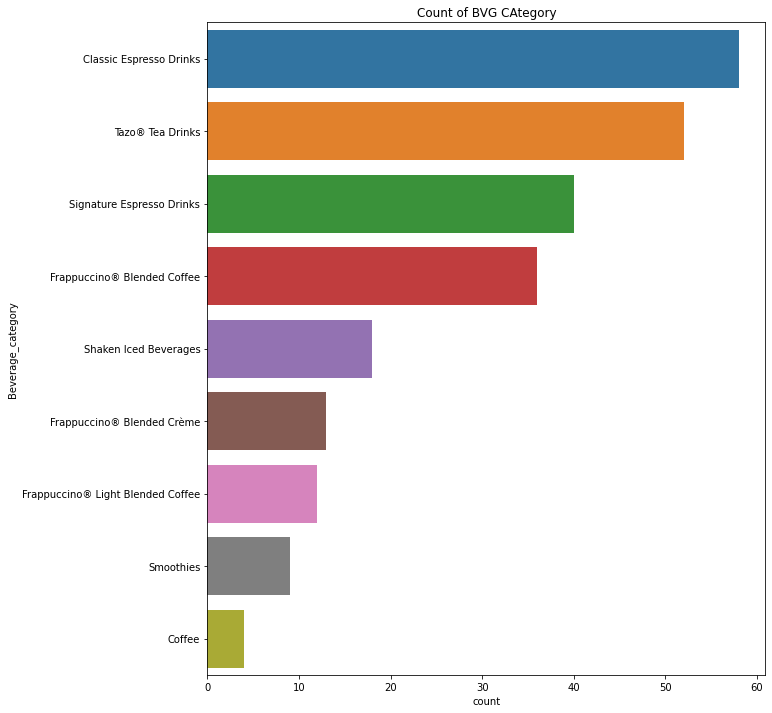

In [49]:
plt.figure(figsize=(10,12))
plt.title('Count of BVG CAtegory')
sns.countplot(y=df['Beverage_category'],order=df['Beverage_category'].value_counts().index)

<AxesSubplot:title={'center':'Count of BVG CAtegory'}, xlabel='count', ylabel='Beverage'>

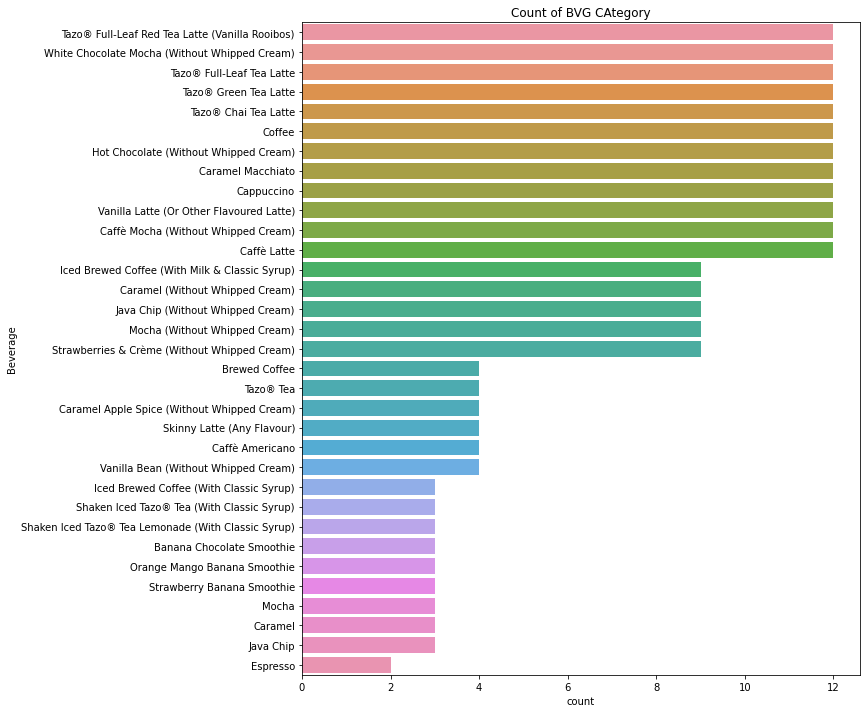

In [50]:
plt.figure(figsize=(10,12))
plt.title('Count of BVG CAtegory')
sns.countplot(y=df['Beverage'],order=df['Beverage'].value_counts().index)

<AxesSubplot:title={'center':'Count of BVG CAtegory'}, xlabel='count', ylabel='Beverage_prep'>

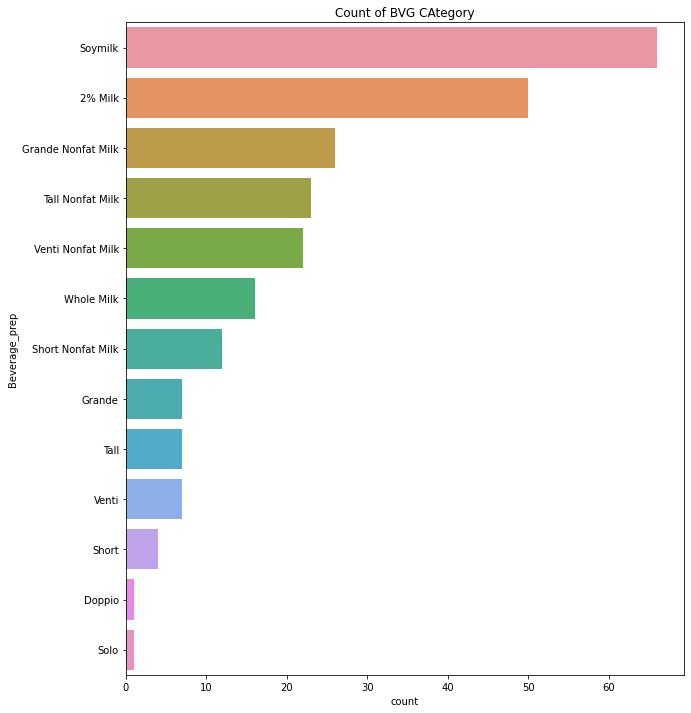

In [51]:
plt.figure(figsize=(10,12))
plt.title('Count of BVG CAtegory')
sns.countplot(y=df['Beverage_prep'],order=df['Beverage_prep'].value_counts().index)

In [52]:
import plotly.express as px

<AxesSubplot:ylabel='Beverage_category,Beverage,Beverage_prep'>

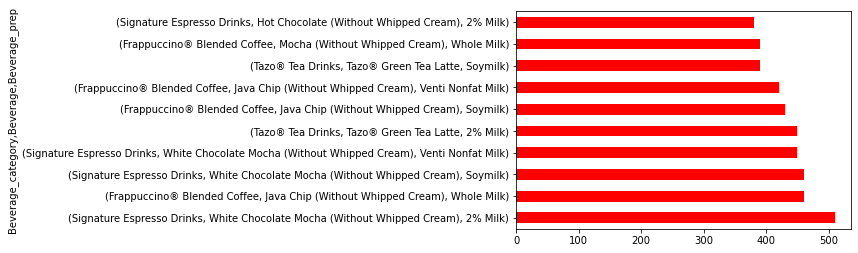

In [158]:
#Beverage which has most calories group wise
df.groupby(['Beverage_category','Beverage','Beverage_prep']).max()['Calories'].sort_values(ascending=False)[:10].plot(kind='barh',color='r')

In [168]:
#Beverage which has most calories categry wise
cdf=df[['Beverage','Calories']].sort_values(by='Calories',ascending=False)[:10]
px.bar(cdf,y=cdf['Calories'],x=cdf['Beverage'],color='Beverage')

<AxesSubplot:ylabel='Beverage_category'>

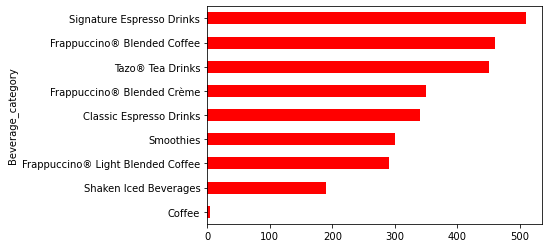

In [180]:
#Beverage which has most calories group wise
df.groupby(['Beverage_category']).max()['Calories'].sort_values(ascending=True).plot(kind='barh',color='r')

In [182]:
cdf=df[['Beverage_category','Calories']].sort_values(by='Calories',ascending=False)
px.bar(cdf,y=cdf['Calories'],x=cdf['Beverage_category'],color='Beverage_category')

In [173]:
df[['Beverage_category']].value_counts()

Beverage_category                
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
dtype: int64

# Top 10 According to Calories

In [194]:
#By bevarages category
topBeverage_cat = pd.DataFrame(
    df.groupby('Beverage_category')['Calories'].mean().nlargest(10).sort_values(ascending = False))
fig2 = px.bar(topBeverage_cat, 
              x = topBeverage_cat.index, y = 'Calories', height = 600, 
              color = 'Calories',
              title = 'Top Beverage Category According to Calories', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()

In [199]:
#by drinks
topBeverage_drink = pd.DataFrame(
    df.groupby('Beverage')['Calories'].mean().nlargest(10).sort_values(ascending = False))
fig2 = px.bar(topBeverage_drink, 
              x = topBeverage_drink.index, y = 'Calories', height = 600, 
              color = 'Calories',
              title = 'Top Beverage Drinks According to Calories', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()

In [200]:
#by drinks
topBeverage_prep = pd.DataFrame(
    df.groupby('Beverage_prep')['Calories'].mean().nlargest(10).sort_values(ascending = False))
fig2 = px.bar(topBeverage_prep, 
              x = topBeverage_prep.index, y = 'Calories', height = 600, 
              color = 'Calories',
              title = 'Top Beverage_Prepation According to Calories', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()

In [201]:
import plotly.graph_objects as go

In [250]:
fig3 = go.Figure()

fig3.add_trace(go.Bar(x = topBeverage_drink.index, y = df['Calories'],name='Bevarage'))
fig3.add_trace(go.Bar(x = topBeverage_cat.index, y = df['Calories'],name='Bevarage_category'))
fig3.add_trace(go.Bar(x = topBeverage_prep.index, y = df['Calories'],name='Bevarage_prep'))

fig3.update_layout(title = 'Time Series of Most Affected countries"s Cumulative Death Cases',barmode = 'stack', height = 600)

fig3.show()

# AVG Top10 Drinks According to protien

In [392]:
#by drinks
topBeverage_drink_P = pd.DataFrame(
    df.groupby('Beverage')['Protein (g) '].mean().sort_values(ascending = False))[:10]
fig2 = px.bar(topBeverage_drink_P, 
              x = topBeverage_drink_P.index, y = 'Protein (g) ', height = 600,
              color='Protein (g) ',
              title = 'Top Beverage Drinks According to Protien (g)', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()

# AVG Top10  Sugary Drinks

In [391]:
#by drinks
topBeverage_drink_S = pd.DataFrame(
    df.groupby('Beverage')['Sugars (g)'].mean().sort_values(ascending = False))[:10]
fig2 = px.bar(topBeverage_drink_S, 
              x = topBeverage_drink_S.index, y = 'Sugars (g)', height = 600,
              color='Sugars (g)',
              title = 'Top Beverage Drinks According to Sugars (g)', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()

# AVG Top10 Drinks According to Carbohydrate(g)


In [389]:
#by drinks
topBeverage_drink_Ca = pd.DataFrame(
    df.groupby('Beverage')['Total Carbohydrates (g) '].mean().sort_values(ascending = False))[:10]
fig2 = px.bar(topBeverage_drink_Ca, 
              x = topBeverage_drink_Ca.index, y = 'Total Carbohydrates (g) ', height = 600,
              color='Total Carbohydrates (g) ',
              title = 'Top Beverage Drinks According to Total Carbohydrates (g) ', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()

# AVG Top10 Drinks According to Caffeine(mg)

In [388]:
#by drinks
topBeverage_drink_Cf = pd.DataFrame(
    df.groupby('Beverage')['Caffeine (mg)'].mean().sort_values(ascending = False))[:10]
fig2 = px.bar(topBeverage_drink_Cf, 
              x = topBeverage_drink_Cf.index, y = 'Caffeine (mg)', height = 600,
              color='Caffeine (mg)',
              title = 'Top Beverage Drinks According to Total Caffeine (g) ', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()


In [387]:
#by drinks
topBeverage_drink_C = pd.DataFrame(
    df.groupby('Beverage')['Calories'].mean().sort_values(ascending = False))[:10]
fig2 = px.bar(topBeverage_drink_C, 
              x = topBeverage_drink_C.index, y = 'Calories', height = 600,
              color='Calories',
              title = 'Top Beverage Drinks According to Total Carbohydrates (g) ', 
              color_continuous_scale = px.colors.sequential.Viridis)
fig2.show()

# Avg top Drinks with their nutrition facts

In [360]:

fig3 = go.Figure()
fig3.add_trace(go.Bar(x = topBeverage_drink_C.index, y = topBeverage_drink_C['Calories'],name='Calories'))
fig3.add_trace(go.Bar(x = topBeverage_drink_P.index, y = topBeverage_drink_P['Protein (g) '],name='Protein (g) '))
fig3.add_trace(go.Bar(x = topBeverage_drink_S.index, y = topBeverage_drink_S['Sugars (g)'],name='Sugars (g)'))
fig3.add_trace(go.Bar(x = topBeverage_drink_Ca.index, y = topBeverage_drink_Ca['Total Carbohydrates (g) '],name='Total Carbohydrates (g) '))
fig3.add_trace(go.Bar(x = topBeverage_drink_Cf.index, y = topBeverage_drink_Cf['Caffeine (mg)'],name='Caffeine (mg)'))

fig3.update_layout(title = 'Avg top Drinks with their nutrition facts',barmode = 'stack', height = 800)

fig3.show()

# Creating New DF to for Vitamins and Minerals `

In [370]:
topBeverage_drink_VA = pd.DataFrame(
    df.groupby('Beverage')['Vitamin_A'].mean().sort_values(ascending = False))[:10]
topBeverage_drink_VC = pd.DataFrame(
    df.groupby('Beverage')['Vitamin_C'].mean().sort_values(ascending = False))[:10]
topBeverage_drink_Calc = pd.DataFrame(
    df.groupby('Beverage')['Calcium'].mean().sort_values(ascending = False))[:10]

topBeverage_drink_Iron = pd.DataFrame(
    df.groupby('Beverage')['Iron'].mean().sort_values(ascending = False))[:10]

# Visualization of Vitamin and Minearals According to Bevarages

In [378]:
fig4=go.Figure()
fig4.add_trace(go.Bar(x=topBeverage_drink_VA.index,
                      y=topBeverage_drink_VA['Vitamin_A'],name='Vitamin_A'))
fig4.add_trace(go.Bar(x=topBeverage_drink_VC.index,
                      y=topBeverage_drink_VC['Vitamin_C'],name='Vitamin_C'))
fig4.add_trace(go.Bar(x=topBeverage_drink_Calc.index,
                      y=topBeverage_drink_Calc['Calcium'],name='Calcium'))
fig4.add_trace(go.Bar(x=topBeverage_drink_Iron.index,
                      y=topBeverage_drink_Iron['Iron'],name='Iron'))
fig4.update_layout(title = 'top Drinks with Vitamin A&C, Minearls',barmode = 'stack', height = 800)
fig4.show()